In [9]:
#singul perceptron  이진 분류(Binary Classification)=BCELoss
import torch
import torch.nn as nn
import torch.optim as opt

device='cuda'if torch.cuda.is_available()else 'cpu'
torch.manual_seed(777)
if device=='cuda':
    torch.cuda.manual_seed_all(777)
    
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear=nn.Linear(2,1,bias=True)
sigmoid=nn.Sigmoid()
model=nn.Sequential(linear,sigmoid).to(device)

criter=torch.nn.BCELoss().to(device)
opt=opt.SGD(model.parameters(),lr=1)

for epoch in range(10001):
    opt.zero_grad()
    hypoth=model(X)
    cost=criter(hypoth,Y)
    cost.backward()
    opt.step()
    
    if epoch % 100==0:
        print(epoch,cost.item())

0 0.7273973822593689
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [15]:
with torch.no_grad():
    hypoth=model(X)
    predict=(hypoth>0.5).float()
    accucuracy=(predict==Y).float().mean()
    print(hypoth.detach().cpu().numpy())

    print(predict.detach().cpu().numpy())
    print(Y.cpu().numpy())
    print(accucuracy.item())

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [1.]
 [1.]
 [0.]]
0.5


In [22]:
#backpropagation  https://wikidocs.net/60682
import torch
import torch.nn as nn
import torch.optim as opt
device='cuda'if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device=='cuda':
    torch.cuda.manual_seed_all(777)
    
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

    
model=nn.Sequential(
    nn.Linear(2,10,bias=True), #input=2, hidden=10
    nn.Sigmoid(),
    nn.Linear(10,100,bias=True),
    nn.Sigmoid(),
    nn.Linear(100,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,1,bias=True),
    nn.Sigmoid()
).to(device)

criter=torch.nn.BCELoss().to(device)
opt=opt.SGD(model.parameters(),lr=1)

for epoch in range(10001):
    hypoth=model(X)
    opt.zero_grad()
    cost=criter(hypoth,Y)
    cost.backward()
    opt.step()
    
    if epoch %100==0:
        print(epoch, cost.item())

0 0.7123862504959106
100 0.6931455135345459
200 0.6931434869766235
300 0.6931414604187012
400 0.6931393146514893
500 0.6931372284889221
600 0.6931349635124207
700 0.6931326389312744
800 0.6931300759315491
900 0.6931273937225342
1000 0.693124532699585
1100 0.6931213140487671
1200 0.6931179165840149
1300 0.6931141018867493
1400 0.693109929561615
1500 0.693105161190033
1600 0.693099856376648
1700 0.6930936574935913
1800 0.6930866241455078
1900 0.6930783987045288
2000 0.6930686235427856
2100 0.6930570602416992
2200 0.6930431127548218
2300 0.6930258274078369
2400 0.6930042505264282
2500 0.6929768323898315
2600 0.6929406523704529
2700 0.6928920745849609
2800 0.692824125289917
2900 0.692724883556366
3000 0.6925715208053589
3100 0.6923163533210754
3200 0.6918479204177856
3300 0.6908588409423828
3400 0.6882866024971008
3500 0.6789494156837463
3600 0.6647471785545349
3700 0.5775047540664673
3800 0.4817139208316803
3900 0.5588605403900146
4000 0.006220773793756962
4100 0.0030661658383905888
4200 

In [24]:
with torch.no_grad():
    hypoth=model(X)
    predict=(hypoth>0.5).float()
    accuracy=(predict==Y).float().mean()
    print(hypoth.detach().cpu().numpy())
    print(predict.detach().cpu().numpy())
    print(Y.cpu().numpy())
    print(accuracy.item())

[[6.3535095e-05]
 [9.9989653e-01]
 [9.9989367e-01]
 [1.1546901e-04]]
[[0.]
 [1.]
 [1.]
 [0.]]
[[0.]
 [1.]
 [1.]
 [0.]]
1.0


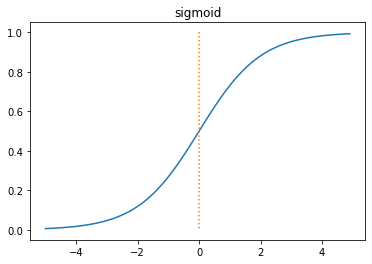

In [25]:
#비선형함수-> 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없습니다.
#sigmoid
import numpy as np
import matplotlib.pyplot as mp


def sigmoid(x):
    return 1/(1+np.exp(-x))
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

mp.plot(x,y)
mp.plot([0,0],[1.0,0.0],':')
mp.title('sigmoid')
mp.show()
'''
기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 됩니다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 됩니다. 이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 합니다.
시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다. 다시 말해 매개변수 
가 업데이트 되지 않아 학습이 되지를 않습니다.
'''


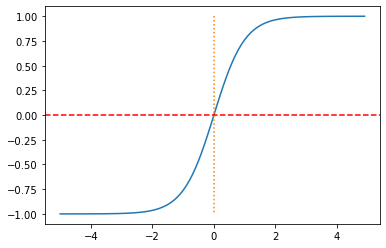

In [32]:
#하이퍼탄젠트
x=np.arange(-5.0,5.0,0.1)
y=np.tanh(x)
mp.plot(x,y)
mp.plot([0,0],[1.0,-1.0],':')
mp.axhline(y=0,color='r',linestyle='--')
mp.show()

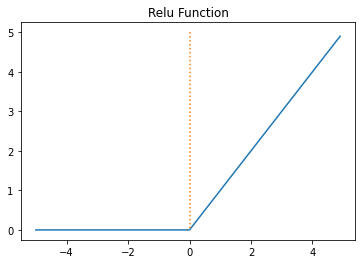

In [34]:
#렐루
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

mp.plot(x, y)
mp.plot([0,0],[5.0,0.0], ':')
mp.title('Relu Function')
mp.show()

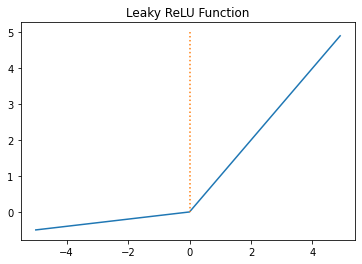

In [36]:
#리키 렐루(Leaky ReLU)
a=0.1
def liky(x):
    return np.maximum(a*x,x)
x = np.arange(-5.0, 5.0, 0.1)
y = liky(x)

mp.plot(x, y)
mp.plot([0,0],[5.0,0.0], ':')
mp.title('Leaky ReLU Function')
mp.show()

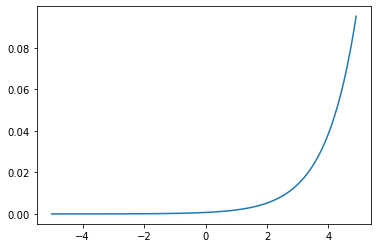

In [39]:
#소프트맥스 함수(Softamx function)
x = np.arange(-5.0, 5.0, 0.1)
y=np.exp(x)/np.sum(np.exp(x))
mp.plot(x,y)
mp.show()

In [40]:
'''
문제	활성화 함수	비용 함수
이진 분류	시그모이드	nn.BCELoss()
다중 클래스 분류	소프트맥스	nn.CrossEntropyLoss()
회귀	없음	MSE'''

'\n문제\t활성화 함수\t비용 함수\n이진 분류\t시그모이드\tnn.BCELoss()\n다중 클래스 분류\t소프트맥스\tnn.CrossEntropyLoss()\n회귀\t없음\tMSE'

In [51]:
%matplotlib inline
import matplotlib.pyplot as mp
from sklearn.datasets import load_digits
digits=load_digits()

print(digits.images[1])
print(digits.target[1])
print(f'{len(digits.images)}')

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
1
1797


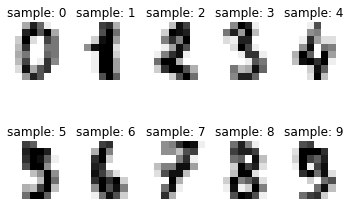

In [78]:
images_and_labels=list(zip(digits.images,digits.target))
for index,(image,label)in enumerate(images_and_labels[:10]):
    mp.subplot(2,5,index+1)
    mp.axis('off')
    mp.imshow(image,cmap=mp.cm.gray_r,interpolation='nearest')
    mp.title('sample: %i' % label)

0
1
2
3
4
5
6
7
8
9
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
Epoch    0/100 Cost: 2.605824
Epoch   10/100 Cost: 2.188030
Epoch   20/100 Cost: 1.941794
Epoch   30/100 Cost: 1.610991
Epoch   40/100 Cost: 1.234849
Epoch   50/100 Cost: 0.907054
Epoch   60/100 Cost: 0.659833
Epoch   70/100 Cost: 0.476392
Epoch   80/100 Cost: 0.347289
Epoch   90/100 Cost: 0.258817


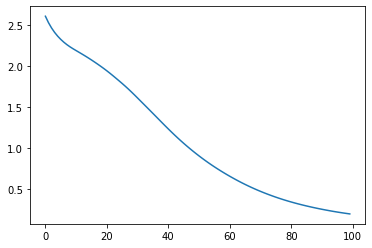

In [99]:
for i in range(10):
    print(digits.target[i])
        
print(digits.data[1])

x=digits.data
y=digits.target

import torch
import torch.nn as nn
from torch import optim as opt

model=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.int64)
loss_fn=nn.CrossEntropyLoss()
opt=opt.Adam(model.parameters())
losses=[]

for epoch in range(100):
    opt.zero_grad()
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    loss.backward()
    opt.step()
    

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        )) 
        
    losses.append(loss.item())
mp.plot(losses)

In [102]:
import numpy as np
import matplotlib.pyplot as mp
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',version=1, cache=True,as_frame=False)
mnist.data[0]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

4


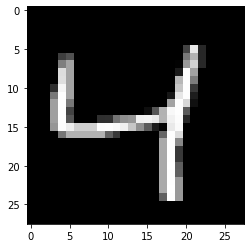

In [163]:
mnist.target[0]
mnist.target=mnist.target.astype(np.int8)

x = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

x[0]
mp.imshow(x[2].reshape(28,28),cmap='gray')
print(y[2])

In [170]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/7,random_state=0)

x_train=torch.Tensor(x_train)
x_test=torch.Tensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

d_train=TensorDataset(x_train,y_train)
d_test=TensorDataset(x_test,y_test)


load_train=DataLoader(d_train,batch_size=64,shuffle=True)
load_test=DataLoader(d_test,batch_size=64,shuffle=True)

In [176]:
from torch import nn

model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3',nn.Linear(100,10))

print(model)

from torch import optim as opt


loss_fn=nn.CrossEntropyLoss()
opt=opt.Adam(model.parameters(),lr=0.01)


def train(epoch):
    model.train()
    for data,targets in load_train:
        opt.zero_grad()
        output=model(data)
        loss=loss_fn(output,targets)
        loss.backward()        
        opt.step()
        
    print(epoch)

    print("epoch{}：완료\n".format(epoch))    
    
def test():
    model.eval()
    
    correct=0
    
    with torch.no_grad():
        
        for data,targets in load_test:
            
            output=model(data)
            
            #pedict=torch.max(output.data,1)
            _, predict = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산

            #correct += predict.eq(targets.data.view_as(predict)).sum()
            correct += predict.eq(targets.data.view_as(predict)).sum() 
            
    data_num=len(load_test.dataset)
    
    
    
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))
    
    

''' outputs의 크기가 (배치 크기)x(클래스의 개수)이므로  열이 하나의 이미지의 대응되는 벡터를 나타냅니다. 따라서 행(0), 열(1) 중 열을 기준으로 최댓값을 뽑아 예측값을 하나 만드는 것입니다. 예를 들어서 배치 크기가 2이고 클래스가 3개인 outputs가 있다고 생각해봅니다.

outputs = [[0.1, 0.4, 0.5], [0.2, 0.6, 0,2]] 

여기서의 최댓값의 위치는 2번째(0.5)와 1번째(0.6)입니다. 즉, 첫번째 이미지는 2라고 예측하는 것이고 두번째 이미지는 1이라고 예측을 하게 됩니다. 이를 torch.max를 이용하여 나타냅니다.

torch.max는 최댓값과 최댓값의 위치를 산출해주는데 여기서 우리는 최댓값은 필요가 없으므로 받지 않아도 됩니다. 따라서 _ (언더바)로 처리하여 해당 출력값은 저장하지 않겠다는 의미입니다. 즉, _, predicted는 최댓값의 위치만 predicted에 저장하겠다는 의미입니다.

따라서 _, predicted = torch.max(outputs.data, 1)의 의미는 각 열(1)마다 최댓값의 위치를 예측값으로 사용하겠다는 의미입니다. 마지막으로 .data는 예측값을 계산할 때는 역전파 계산이 필요없기 때문에 데이터만 사용한다는 의미에서 사용된 것입니다. ( 그런데 지금 보니까 with torch.no_grad()를 사용했기 때문에 .data를 없애도 될 것 같습니다.)''' 

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


' outputs의 크기가 (배치 크기)x(클래스의 개수)이므로  열이 하나의 이미지의 대응되는 벡터를 나타냅니다. 따라서 행(0), 열(1) 중 열을 기준으로 최댓값을 뽑아 예측값을 하나 만드는 것입니다. 예를 들어서 배치 크기가 2이고 클래스가 3개인 outputs가 있다고 생각해봅니다.\n\noutputs = [[0.1, 0.4, 0.5], [0.2, 0.6, 0,2]] \n\n여기서의 최댓값의 위치는 2번째(0.5)와 1번째(0.6)입니다. 즉, 첫번째 이미지는 2라고 예측하는 것이고 두번째 이미지는 1이라고 예측을 하게 됩니다. 이를 torch.max를 이용하여 나타냅니다.\n\ntorch.max는 최댓값과 최댓값의 위치를 산출해주는데 여기서 우리는 최댓값은 필요가 없으므로 받지 않아도 됩니다. 따라서 _ (언더바)로 처리하여 해당 출력값은 저장하지 않겠다는 의미입니다. 즉, _, predicted는 최댓값의 위치만 predicted에 저장하겠다는 의미입니다.\n\n따라서 _, predicted = torch.max(outputs.data, 1)의 의미는 각 열(1)마다 최댓값의 위치를 예측값으로 사용하겠다는 의미입니다. 마지막으로 .data는 예측값을 계산할 때는 역전파 계산이 필요없기 때문에 데이터만 사용한다는 의미에서 사용된 것입니다. ( 그런데 지금 보니까 with torch.no_grad()를 사용했기 때문에 .data를 없애도 될 것 같습니다.)'

In [177]:
test()


테스트 데이터에서 예측 정확도: 1064/10000 (11%)



tensor(2)
tensor(2)
이 이미지 데이터의 정답 레이블은 2입니다


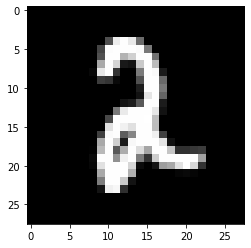

In [195]:
'''
for epoch in range(3):
    train(epoch)
    
test()
'''
index=2019

model.eval()
data=x_test[index]
output=model(data)
_,predict=torch.max(output.data,0)

print(predict)

x_test_show=(x_test[index]).numpy()
mp.imshow(x_test_show.reshape(28,28),cmap='gray')
print(y_test[index])
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))


In [196]:
#overfitting막기  ->drop out
class NN(nn.Module):
    def __init__(self,input,hidden,output):
        super(NN,self).__init__()
        self.f1=nn.Linear(input,hidden)
        self.relu=nn.ReLU()
        self.f2=nn.Linear(hidden,hidden)
        self.relu=nn.ReLU()
        self.f3=nn.Linear(hidden,output)
        
    def forward(self,x):
        out=self.f1(x)
        out=self.relu(out)
        out=self.f2(out)
        out=self.relu(out)
        out=self.f3(out)
        return out

In [198]:
class NN(nn.Module):
    def __init__(self,input,hidden,output):
        super(NN,self).__init__()
        self.f1=nn.Linear(input,hidden)
        self.relu=nn.ReLU()
        self.f2=nn.Linear(hidden,output)
        
    def forward(self,x):
        out=self.f1(x)
        out=self.relu(out)
        out=self.f2(out)
        return out
    
model=NN(10,20,2)
opt=torch.optim.Adam(model.parameters(),lr=1e-4,weight_decay=1e-5)
#가중치 감소(Weight Decay)

기울기 소실(Gradient Vanishing)과 폭주(Exploding)

깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있습니다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다. 이를 기울기 소실(Gradient Vanishing)이라고 합니다.

반대의 경우도 있습니다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 이를 기울기 폭주(Gradient Exploding)이라고 하며, 뒤에서 배울 순환 신경망(Recurrent Neural Network, RNN)에서 발생할 수 있습니다.

가중치 초기화(Weight initialization)
같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 합니다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.

=============================================================================

세이비어 초기화(Xavier Initialization)  ==>이전층 & 다음층의 뉴런 갯수을 이용함
논문 : http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

2010년 세이비어 글로럿과 요슈아 벤지오는 가중치 초기화가 모델에 미치는 영향을 분석하여 새로운 초기화 방법을 제안했습니다. 이 초기화 방법은 제안한 사람의 이름을 따서 세이비어(Xavier Initialization) 초기화 또는 글로럿 초기화(Glorot Initialization)라고 합니다.

이 방법은 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세웁니다. 이전 층의 뉴런의 개수를 
, 다음 층의 뉴런의 개수를 
이라고 해봅시다.

글로럿과 벤지오의 논문에서는 균등 분포를 사용하여 가중치를 초기화할 경우 다음과 같은 균등 분포 범위를 사용하라고 합니다.

세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막습니다. 그런데 세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않습니다. ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우에는 다른 초기화 방법을 사용하는 것이 좋은데, 이를 He 초기화(He initialization)라고 합니다.

================================================

He 초기화(He initialization)  ==>이전 뉴런갯수만 이용함
논문 : https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf

He 초기화(He initialization)는 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 나뉩니다. 다만, He 초기화는 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않습니다. 전과 같이 이전 층의 뉴런의 개수를 
이라고 해봅시다.

He 초기화는 균등 분포로 초기화 할 경우에는 다음과 같은 균등 분포 범위를 가지도록 합니다.
 
정규 분포로 초기화할 경우에는 표준 편차 σ가 다음을 만족하도록 합니다.

시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적입니다.
ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적입니다.
ReLU + He 초기화 방법이 좀 더 보편적입니다.

배치 정규화(Batch Normalization)
ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만, 이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있습니다. 기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)입니다. 배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.

============================================================

내부 공변량 변화(Internal Covariate Shift)
배치 정규화를 이해하기 위해서는 내부 공변량 변화(Internal Covariate Shift)를 이해할 필요가 있습니다. 내부 공변량 변화란 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상을 말합니다. 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생합니다. 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장합니다.

공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미합니다.
내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미합니다.

====================================================================

배치 정규화(Batch Normalization)
배치 정규화(Batch Normalization)는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다. 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행됩니다. 배치 정규화를 요약하면 다음과 같습니다. 입력에 대해 평균을 0으로 만들고, 정규화를 합니다. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행합니다. 이 때 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용하고, β는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달되게 합니다.

배치 정규화의 수식은 다음과 같습니다. 아래에서 
은 배치 정규화를 의미합니다.

Input : 미니 배치 

Output : 

 
미니배치에대한평균
 
미니배치에대한분산
 
정규화
스케일조정과시프트

m은 미니 배치에 있는 샘플의 수
mu(B)는 미니 배치 B에 대한 평균.
sigma(B)는 미니 배치 B에 대한 표준편차.
x-het(i)은 평균이 0이고 정규화 된 입력 데이터.
앱실론 은 분모가 0이 되는 것을 막는 작은 수. 보편적으로 
gama는 정규화 된 데이터에 대한 스케일 매개변수로 학습 대상
beta는 정규화 된 데이터에 대한 시프트 매개변수로 학습 대상
y(i)는 스케일과 시프트를 통해 조정한 의 최종 결과

배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화를 합니다.

배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.
가중치 초기화에 훨씬 덜 민감해집니다.
훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.
미니 배치마다 평균과 표준편차를 계산하므로 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합을 방지하는 효과도 냅니다. 하지만 부수적 효과이므로 드롭 아웃과 함께 사용하는 것이 좋습니다.
배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.
배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있습니다. : https://arxiv.org/pdf/1805.11604.pdf

====================================================================================

배치 정규화의 한계
배치 정규화는 뛰어난 방법이지만 몇 가지 한계가 존재합니다.

1. 미니 배치 크기에 의존적이다.
배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있습니다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 됩니다. 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있습니다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋습니다. 이처럼 배치 정규화는 배치 크기에 의존적인 면이 있습니다.

2. RNN에 적용하기 어렵다.
뒤에서 배우겠지만, RNN은 각 시점(time step)마다 다른 통계치를 가집니다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만듭니다. RNN에서 배치 정규화를 적용하기 위한 몇 가지 논문이 제시되어 있지만, 여기서는 이를 소개하는 대신 배치 크기에도 의존적이지 않으며, RNN에도 적용하는 것이 수월한 층 정규화(layer normalization)라는 방법을 소개하고자 합니다.

층 정규화(Layer Normalization)
층 정규화를 이해하기에 앞서 배치 정규화를 시각화해보겠습니다. 다음은 
이 3이고, 특성의 수가 4일 때의 배치 정규화를 보여줍니다. 미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미함을 상기합시다.

https://wikidocs.net/61271